In [304]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
import xgboost as xgb
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [305]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test=pd.read_csv('../input/home-data-for-ml-course/test.csv')

print (train.shape)
print (test.shape)

train_id = train['Id']
test_id = test['Id']

#y = np.log1p(total_data.SalePrice)


train.head()

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [306]:
print (test_id)


0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64


In [307]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

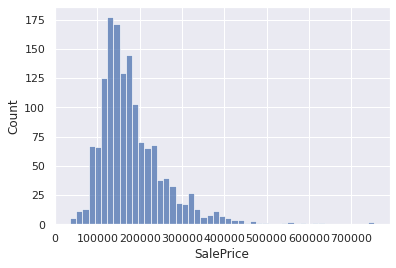

In [308]:
sns.histplot(data=train, x="SalePrice")


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

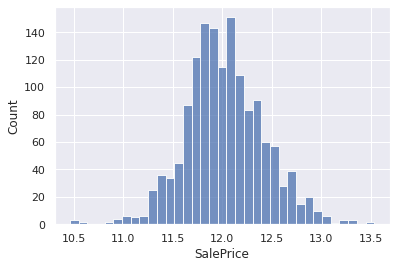

In [309]:
train['SalePrice'] = np.log1p(train.SalePrice)
sns.histplot(data=train, x=train['SalePrice'])

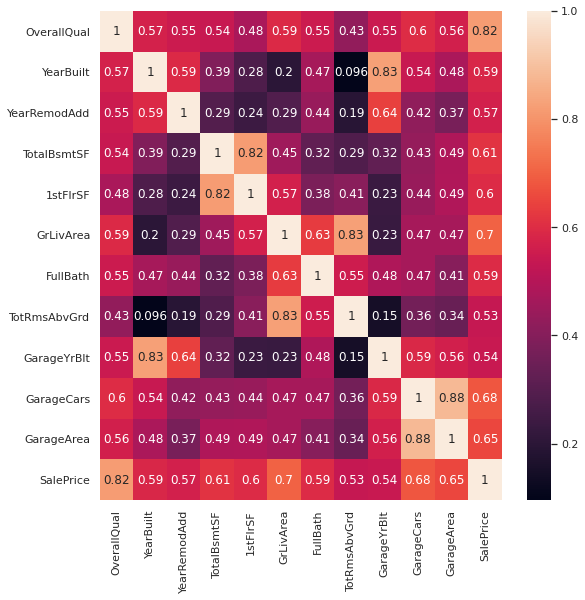

In [310]:
cor=train.corr()
high_cor=cor.index[cor['SalePrice']>.5]

plt.figure(figsize=(9,9))

ax = sns.heatmap(train[high_cor].corr(),annot=True)


In [311]:
corr_series=cor['SalePrice'].sort_values(ascending=False)
corr_series

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

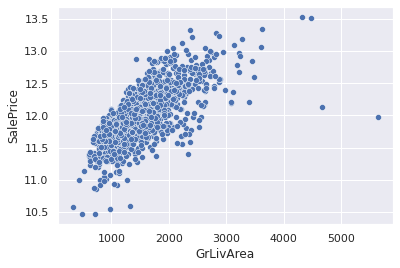

In [312]:

sns.scatterplot(data=train, y='SalePrice',x='GrLivArea')


In [313]:
train = train.drop(['Id','PoolQC', 'Fence','MiscFeature','Alley'], axis=1)
test = test.drop(['Id','PoolQC', 'Fence','MiscFeature','Alley'], axis=1)

train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)

#total_data = total_data[features]
print(train.shape)
print(test.shape)


train

(1456, 76)
(1459, 75)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,11.864469


Gd    378
TA    312
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64
0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64


<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

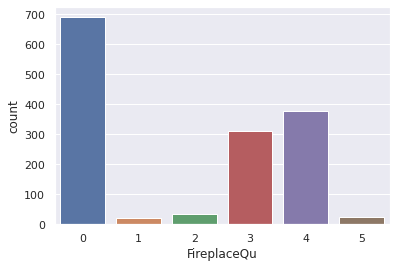

In [314]:
print(train['FireplaceQu'].value_counts())
print(train['Fireplaces'].value_counts())
train.FireplaceQu.fillna('NO', inplace=True)

preserved_mapper = {'Ex':5 , 'Gd': 4, 'TA': 3,'Fa':2, 'Po':1, 'NO':0}
train.FireplaceQu.replace(preserved_mapper,inplace=True)


sns.countplot(data=train, x='FireplaceQu')


In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   LotShape       1456 non-null   object 
 6   LandContour    1456 non-null   object 
 7   Utilities      1456 non-null   object 
 8   LotConfig      1456 non-null   object 
 9   LandSlope      1456 non-null   object 
 10  Neighborhood   1456 non-null   object 
 11  Condition1     1456 non-null   object 
 12  Condition2     1456 non-null   object 
 13  BldgType       1456 non-null   object 
 14  HouseStyle     1456 non-null   object 
 15  OverallQual    1456 non-null   int64  
 16  OverallCond    1456 non-null   int64  
 17  YearBuilt      1456 non-null   int64  
 18  YearRemo

In [316]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [317]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

print (X.shape)
print (y.shape)

X.info()

(1456, 75)
(1456,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   LotShape       1456 non-null   object 
 6   LandContour    1456 non-null   object 
 7   Utilities      1456 non-null   object 
 8   LotConfig      1456 non-null   object 
 9   LandSlope      1456 non-null   object 
 10  Neighborhood   1456 non-null   object 
 11  Condition1     1456 non-null   object 
 12  Condition2     1456 non-null   object 
 13  BldgType       1456 non-null   object 
 14  HouseStyle     1456 non-null   object 
 15  OverallQual    1456 non-null   int64  
 16  OverallCond    1456 non-null   int64  
 17  YearBuilt      1456 non-null   in

In [323]:
#print(total_data.head(1))

categorical_features = [col for col in X.columns if X[col].dtype == "object"]
numeric_features = [col for col in X.columns if X[col].dtype in ['int64','float64']]

#print(categorical_features)
#print (numeric_features )

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OE encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocessor.fit(X)
X_processed = pd.DataFrame(preprocessor.transform(X), columns = X.columns, index = X.index)

X_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   float64
 1   MSZoning       1456 non-null   float64
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   float64
 4   Street         1456 non-null   float64
 5   LotShape       1456 non-null   float64
 6   LandContour    1456 non-null   float64
 7   Utilities      1456 non-null   float64
 8   LotConfig      1456 non-null   float64
 9   LandSlope      1456 non-null   float64
 10  Neighborhood   1456 non-null   float64
 11  Condition1     1456 non-null   float64
 12  Condition2     1456 non-null   float64
 13  BldgType       1456 non-null   float64
 14  HouseStyle     1456 non-null   float64
 15  OverallQual    1456 non-null   float64
 16  OverallCond    1456 non-null   float64
 17  YearBuilt      1456 non-null   float64
 18  YearRemo

In [319]:
X_processed.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,...,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03
mean,2.318048e-17,-1.964241e-16,5.368111e-17,-2.464451e-16,3.904081e-17,-9.918806e-16,4.858141e-15,4.880101e-17,-8.296172e-17,-2.989062e-17,...,1.512831e-16,-1.659234e-16,4.446992e-16,-3.904081e-17,-8.967186e-17,4.111485e-16,1.939840e-16,-1.342028e-16,2.074043e-16,-1.256626e-16
std,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00
min,-8.711718e-01,-2.324307e+00,-9.281155e-01,-3.716479e+00,-4.109470e+00,-3.285242e+00,-1.686572e+00,-5.737566e-01,-1.016005e+00,-2.890821e-01,...,-3.498516e+00,-2.854575e+00,-5.862477e+00,-1.255277e+00,-1.520962e+00,-6.509850e+00,-7.675407e+00,-3.733597e+00,-4.839957e+00,-3.439122e+00
25%,-8.711718e-01,-4.579724e-01,-2.952139e-01,-7.950627e-01,-5.174614e-01,-5.692198e-01,-8.752398e-01,-5.737566e-01,-1.016005e+00,-2.890821e-01,...,3.028566e-01,-4.211668e-01,2.563521e-01,-6.873206e-01,-2.865580e-01,2.159556e-01,1.862832e-01,2.901760e-01,3.127547e-01,2.085645e-01
50%,-1.626858e-01,-2.727983e-02,-9.944678e-02,-6.470858e-02,-5.174614e-01,2.698005e-02,4.204704e-01,-5.737566e-01,-1.301793e-01,-2.890821e-01,...,3.028566e-01,7.955374e-01,2.563521e-01,-6.873206e-01,-2.865580e-01,2.159556e-01,1.862832e-01,2.901760e-01,3.127547e-01,2.085645e-01
75%,3.096382e-01,4.512675e-01,1.155699e-01,6.656456e-01,3.805408e-01,9.544021e-01,9.290669e-01,3.488153e-01,6.266086e-01,-2.890821e-01,...,3.028566e-01,7.955374e-01,2.563521e-01,1.584504e+00,9.478457e-01,2.159556e-01,1.862832e-01,2.901760e-01,3.127547e-01,2.085645e-01
max,3.143582e+00,1.164928e+01,2.077593e+01,2.856708e+00,3.074547e+00,1.285624e+00,1.219693e+00,8.468296e+00,4.071098e+00,8.839724e+00,...,3.028566e-01,7.955374e-01,2.563521e-01,1.584504e+00,9.478457e-01,2.159556e-01,1.862832e-01,2.901760e-01,3.127547e-01,1.120486e+00


In [320]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=1)

models = {
'Linear Regression' : LinearRegression(),
'RandomForest'   : RandomForestRegressor(),
'DecisionTree': DecisionTreeRegressor(),
'KNeighborsRegressor' : neighbors.KNeighborsRegressor(),
'XGBRegressor':xgb.XGBRegressor(),
'ARDRegression':linear_model.ARDRegression(),
'SVR Linear': SVR(kernel='linear'),
'SVR RBF': SVR(kernel='rbf'),
'Ridge': linear_model.Ridge(),   
'BayesianRidge':linear_model.BayesianRidge()
}

for name,model in models.items():
    print(name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'R2 Score',r2_score(y_test, y_pred))
    print(f'Mean_Squared_Error:',mean_squared_error(y_test, y_pred))
    print(f'Mean_Root_Squared_Error:',mean_squared_error(y_test, y_pred, squared=False))
    print(f'Mean_Absolute_Error:',mean_absolute_error(y_test, y_pred))

Linear Regression
R2 Score 0.9121581440342981
Mean_Squared_Error: 0.015764359923498443
Mean_Root_Squared_Error: 0.12555620225022115
Mean_Absolute_Error: 0.08709029816098364
RandomForest
R2 Score 0.900778547458116
Mean_Squared_Error: 0.017806576065666355
Mean_Root_Squared_Error: 0.13344128321350315
Mean_Absolute_Error: 0.09286184357644166
DecisionTree
R2 Score 0.7468023334248046
Mean_Squared_Error: 0.04543960397694494
Mean_Root_Squared_Error: 0.21316567260453767
Mean_Absolute_Error: 0.15242420506570067
KNeighborsRegressor
R2 Score 0.8276198735716895
Mean_Squared_Error: 0.030935848597451004
Mean_Root_Squared_Error: 0.1758858965279792
Mean_Absolute_Error: 0.1279948622396528
XGBRegressor
R2 Score 0.8983931887889425
Mean_Squared_Error: 0.018234659605046163
Mean_Root_Squared_Error: 0.13503577157570568
Mean_Absolute_Error: 0.09734434317714061
ARDRegression
R2 Score 0.902013899559036
Mean_Squared_Error: 0.017584876114805154
Mean_Root_Squared_Error: 0.13260797907669492
Mean_Absolute_Error: 0.09

In [321]:
model_final = Ridge()
model_final.fit(X_train,y_train)
y_pred = model_final.predict(X_test)
print(f'R2 Score',r2_score(y_test, y_pred))
print(f'Mean_Squared_Error:',mean_squared_error(y_test, y_pred))
print(f'Mean_Root_Squared_Error:',mean_squared_error(y_test, y_pred, squared=False))
print(f'Mean_Absolute_Error:',mean_absolute_error(y_test, y_pred))

R2 Score 0.9122364382443723
Mean_Squared_Error: 0.015750309012415486
Mean_Root_Squared_Error: 0.12550023510900482
Mean_Absolute_Error: 0.08705232696871441


In [324]:
test.FireplaceQu.fillna('NO', inplace=True)
test.FireplaceQu.replace(preserved_mapper,inplace=True)
test_processed = pd.DataFrame(preprocessor.transform(test), columns = test.columns, index = test.index)


In [322]:
test_pred = np.expm1(model_final.predict(test_processed))

print(test_pred)
output = pd.DataFrame({'Id': test_id,
                       
                       'SalePrice': test_pred})
output.to_csv('submission.csv', index=False)
output.head()


[123390.18996469 162084.3035565  178497.37422331 ... 170000.44796088
 121312.91098456 231385.9352265 ]


,Id,SalePrice
0,1461,123390.189965
1,1462,162084.303557
2,1463,178497.374223
3,1464,197645.063685
4,1465,184765.507791
